![Screen%20Shot%202022-05-23%20at%204.46.33%20PM.png](attachment:Screen%20Shot%202022-05-23%20at%204.46.33%20PM.png)

## I. PROBLEM STATEMENT (5 Points)

Define and Explain the regression problem you want to solve. (Min of 100, Max of 300 Words)

In [1]:
#@title
## Insert your explanation here:


  Diabetes is a chronic condition that develops when the pancreas stops producing insulin or when the body's insulin is not properly utilized. Learning how to apply Machine Learning can aid with diabetes prediction. The goal of this study is to determine whether or not someone has diabetes. Several medical variables (independent) and one outcome variable make up the data set (Dependent). Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age are the independent variables in this data set. The value of the outcome variable is either 1 or 0, indicating whether or not a person has diabetes(1) (0).

## II. DATASET DESCRIPTION (5 Points)

Look for Public Datasets. Define and Explain the dataset you will use for classification-ensemble problem you want to solve. Include the link of where the public dataset downloaded (Min of 100, Max of 300 Words)

In [2]:
## Insert answer here:



Pregnancies : Number of times a woman has been pregnant

Glucose : Plasma Glucose concentration of 2 hours in an oral glucose tolerance test

BloodPressure : Diastollic Blood Pressure (mm hg)

SkinThickness : Triceps skin fold thickness(mm)

Insulin : 2 hour serum insulin(mu U/ml)

BMI : Body Mass Index ((weight in kg/height in m)^2)

Age : Age(years)

DiabetesPedigreeFunction : scores likelihood of diabetes based on family history)

Outcome : 0(doesn't have diabetes) or 1 (has diabetes)

## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data (5 Points)

In [3]:
## Insert code here:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('raw_diabetes.csv')

### 2. Get an overview of the dataset: (5 Points)

In [5]:
## Insert code here:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3. Print the first five and last five rows of the dataset (5 Points)

In [6]:
## Insert code here:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 4. Find the summary statistics of the dataset (5 Points)

In [7]:
## Insert code here:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages. (5 Points)

In [8]:
## Insert code here:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


### 6. Plot the nullity matrix and nullity correlation heatmap. (5 Points)

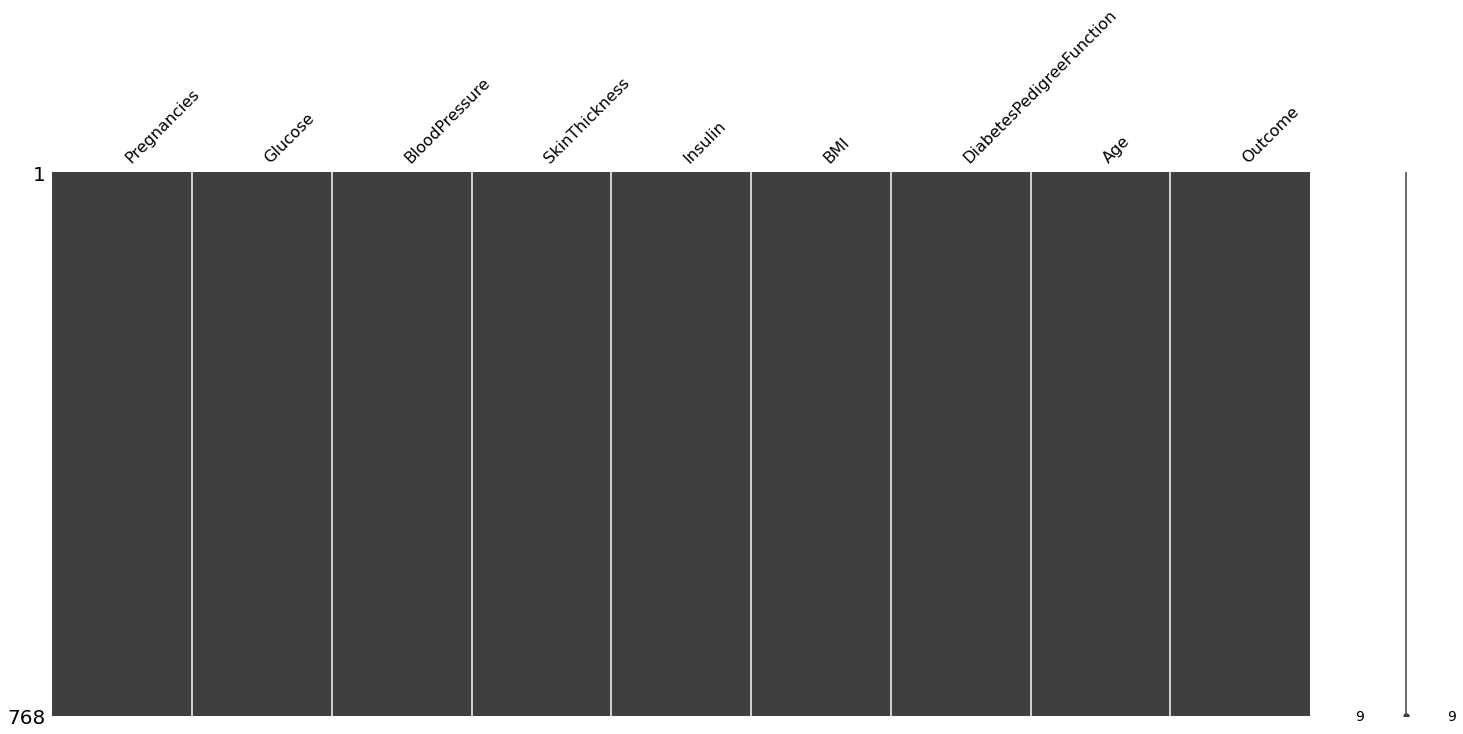

In [9]:
## Insert code here:
msno.matrix(data)
plt.show()


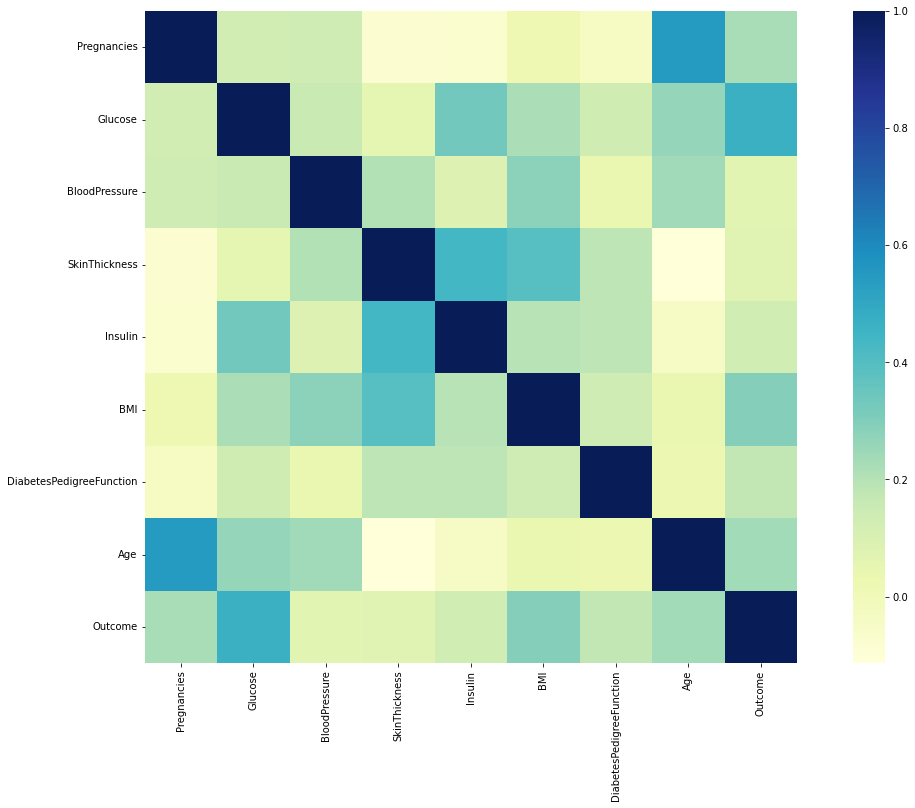

In [10]:
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(), square=True, cmap="YlGnBu")
plt.show()

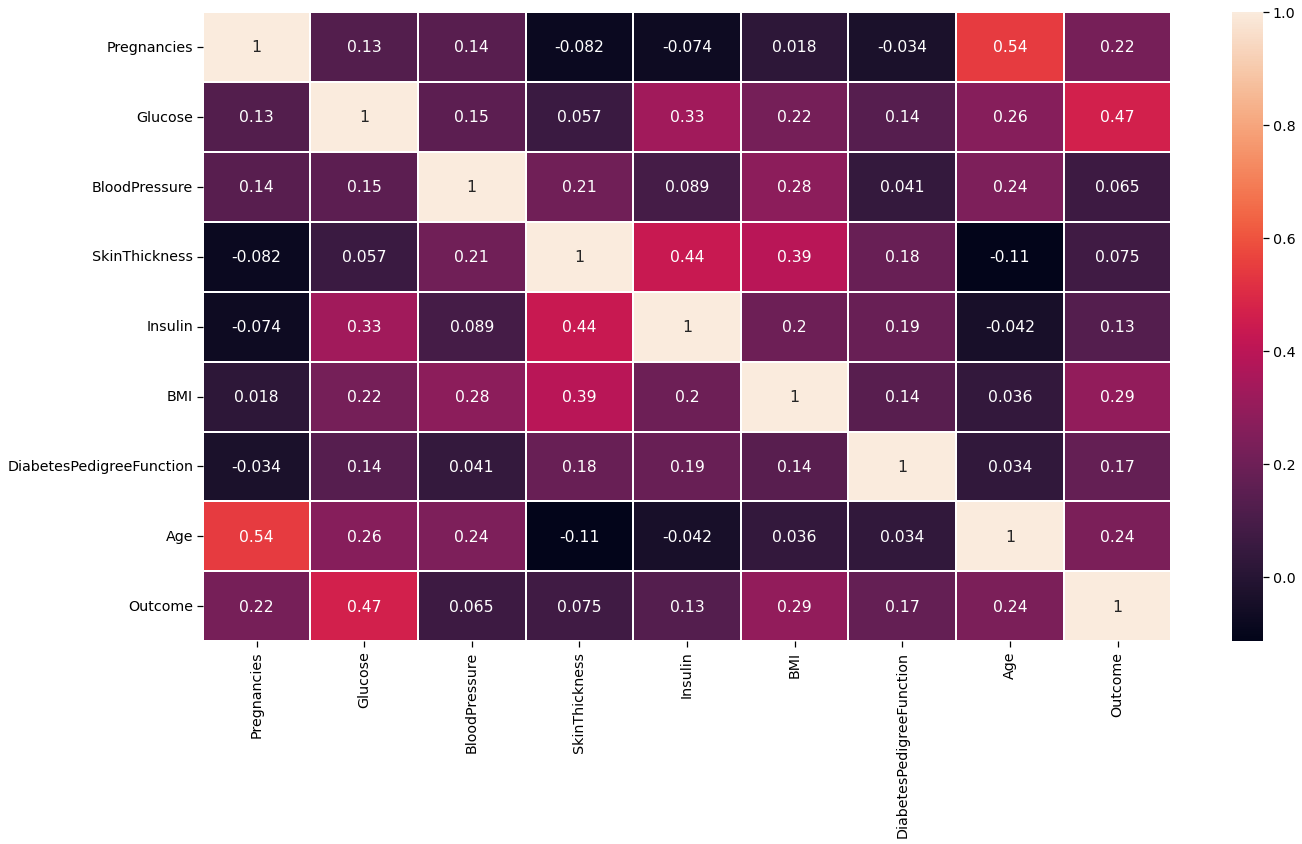

In [11]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

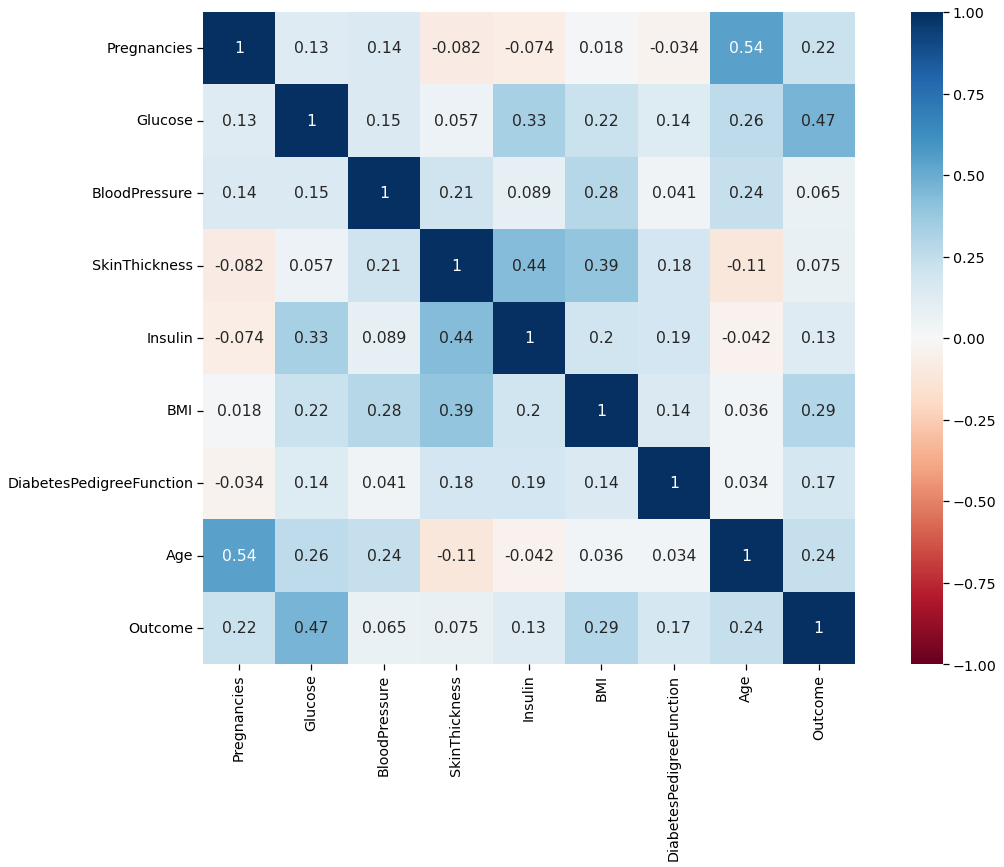

In [12]:
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

### 7. Delete the columns having more than 80% of values missing. (5 Points)

In [13]:
## Insert code here:



This section is not applicable to my dataset because there is no columns having more than 80% of missing values





### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation (5 Points)

In [14]:
## Insert code here:

This section is not applicable and there is no need to impute null values because according to the summary statistics of my dataset, there is no null values

### 9. Export the Cleaned Dataset. (5 Points)

In [15]:
## Insert code here:
data.to_csv('cleaned_diabetes.csv')


## IV.  AI MODELLING 

#### IF REGRESSION: Use Applied Regression Analysis (ACA) using ENSEMBLE
#### IF CLASSIFICATION: Use Applied Classification Analysis (ACA) using ENSEMBLE

### 1. Import the required dependencies. (5 Points)

In [16]:
## Insert your code here:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

### 2. Read the cleaned data. (5 Points)

In [17]:
## Insert your code here:
data = pd.read_csv('cleaned_diabetes.csv')

### 3. Divide the dataset into train and validation DataFrames. (5 Points)



In [18]:
## Insert your code here:
data.columns


Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [19]:
x=data.drop(["Outcome"],axis=True)
y=data["Outcome"]

In [20]:
#from sklearn import preprocessing
#from sklearn import utils

#convert y values to categorical values
#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)
#print(y_transformed)

In [21]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.20,random_state=11)

In [22]:
print("input - training set :", x_train.shape)
print("output - training set :", y_train.shape)
print("output - training set :", x_val.shape)
print("output - training set :", y_val.shape)

input - training set : (614, 9)
output - training set : (614,)
output - training set : (154, 9)
output - training set : (154,)


### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers/regressor and 1 stacked model. (10 Points)

NOTE: 
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques. 
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

KNN

In [23]:
params_knn = {
    "leaf_size": list(range(1,30)),
    "n_neighbors": list(range(1,50)),
    "p": [1,2]
}

In [24]:
from sklearn.model_selection import GridSearchCV

grid_search_kn = GridSearchCV(KNeighborsClassifier(), params_knn, verbose=1, cv=5)
grid_search_kn.fit(x_train, y_train);
print ("Best Score: ", grid_search_kn.best_score_)
print ("Best Parameters: ", grid_search_kn.best_params_)
print ("Best Estimator: ", grid_search_kn.best_estimator_)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits
Best Score:  0.710129281620685
Best Parameters:  {'leaf_size': 1, 'n_neighbors': 5, 'p': 1}
Best Estimator:  KNeighborsClassifier(leaf_size=1, p=1)


DECISION TREE


In [25]:
decision_tree = DecisionTreeClassifier()
param_dict = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]
}
grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [26]:
grid.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 2}

In [27]:
grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=2)

In [28]:
grid.best_score_

0.7621884579501533

LOGISTIC REGRESSION


In [29]:
params_lr = {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]          
}

In [30]:
grid_search_lr = GridSearchCV(LogisticRegression(random_state=11), params_lr, cv=10)
grid_search_lr.fit(x_train, y_train)
print ("Best Score: ", grid_search_lr.best_score_)
print ("Best Parameters: ", grid_search_lr.best_params_)
print ("Best Estimator: ", grid_search_lr.best_estimator_)

c:\Users\Mark Vincent\anaconda3\envs\dataanalystpy38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mark Vincent\anaconda3\envs\dataanalystpy38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Best Score:  0.7638286620835537
Best Parameters:  {'C': 1000.0, 'penalty': 'l2'}
Best Estimator:  LogisticRegression(C=1000.0, random_state=11)


c:\Users\Mark Vincent\anaconda3\envs\dataanalystpy38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
kneighbors_params = {
    'leaf_size': 28, 
    'n_neighbors': 1,
    'p': 1
}

In [32]:
decisiontree_params = {
    'max_leaf_nodes': 8, 
    'min_samples_split': 2
}

In [33]:
logisticregression_params = {
    'C': 1.0, 
    'penalty': 'l2'
}

### 5. Calculate the performance and use a metric accordingly (Target Score >= 90%): (5 Points)

In [34]:
## Insert your code here:
knn = KNeighborsClassifier(**kneighbors_params)
knn.fit(x_train, y_train)
knnpred_val = knn.predict(x_val)
accuracyscore = accuracy_score(y_val, knnpred_val)
precisionscore = precision_score(y_val, knnpred_val, average='weighted')
recallscore = recall_score(y_val, knnpred_val, average='macro')
f1score = f1_score(y_val, knnpred_val, average = 'micro')
cm_rf = confusion_matrix(y_val, knnpred_val)
print("--RANDOM FOREST CLASSIFIER RESULTS--")
print("Accuracy: ", accuracyscore*100)
print("Precision: ", precisionscore*100)
print("Recall: ", recallscore*100)
print("F1-Score: ", f1score*100)
print("Confusion Matrix: \n", cm_rf)


--RANDOM FOREST CLASSIFIER RESULTS--
Accuracy:  62.33766233766234
Precision:  61.101700232135016
Recall:  56.94444444444444
F1-Score:  62.33766233766234
Confusion Matrix: 
 [[75 25]
 [33 21]]


In [35]:
dt = DecisionTreeClassifier(**decisiontree_params, random_state=11)
dt.fit(x_train, y_train)
dtpred_val = dt.predict(x_val)
accuracyscore1 = accuracy_score(y_val, dtpred_val)
precisionscore1 = precision_score(y_val, dtpred_val, average='weighted')
recallscore1 = recall_score(y_val, dtpred_val, average='weighted')
f1score1 = f1_score(y_val, dtpred_val, average = 'micro')
cm_rf1 = confusion_matrix(y_val, dtpred_val)
print("--DECISION TREE CLASSIFIER RESULTS--")
print("Accuracy: ", accuracyscore1*100)
print("Precision: ", precisionscore1*100)
print("Recall: ", recallscore1*100)
print("F1-Score: ", f1score1*100)
print("Confusion Matrix: \n", cm_rf1)

--DECISION TREE CLASSIFIER RESULTS--
Accuracy:  72.72727272727273
Precision:  72.3146853146853
Recall:  72.72727272727273
F1-Score:  72.72727272727273
Confusion Matrix: 
 [[81 19]
 [23 31]]


In [36]:
estimator_list = [
    ('knn', knn),
    ('dt', dt),
     ]
stacked_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression(**logisticregression_params))
stacked_model.fit(x_train, y_train)
stacked_preds_val = stacked_model.predict(x_val)
accuracyscore2 = accuracy_score(y_val, stacked_preds_val)
precisionscore2 = precision_score(y_val, stacked_preds_val, average='micro')
recallscore2 = recall_score(y_val, stacked_preds_val, average='micro')
f1score2 = f1_score(y_val, stacked_preds_val, average = 'micro')
cm_rf2 = confusion_matrix(y_val, stacked_preds_val)
print("--STACKED MODEL RESULTS--")
print("Accuracy: ", accuracyscore2*100)
print("Precision: ", precisionscore2*100)
print("Recall: ", recallscore2*100)
print("F1-Score: ", f1score2*100)
print("Confusion Matrix: \n", cm_rf2)

--STACKED MODEL RESULTS--
Accuracy:  72.72727272727273
Precision:  72.72727272727273
Recall:  72.72727272727273
F1-Score:  72.72727272727273
Confusion Matrix: 
 [[81 19]
 [23 31]]


### 6. Plot the performane accordingly, use the appropriate plotting: (5 Points)

In [37]:
## Insert your code here:



### 7. Test the final values on the test dataset. (5 Points)

In [38]:
## Insert your code here:



### 8. Export the Final Model using PICKLE Library. (5 Points)

In [39]:
## Insert your code here:



## V.  FINAL DOCUMENTATION

#### Publishable Paper Article (50 Points)

In [ ]:
## Insert your GDrive Link of the Word file of your Final Documentation here, following the IEEE format template.



![Screen%20Shot%202022-05-23%20at%204.35.28%20PM.png](attachment:Screen%20Shot%202022-05-23%20at%204.35.28%20PM.png)